In [93]:
import numpy as np

In [94]:
X= 2*np.random.rand(100,1)
y = 4+3*X + np.random.randn(100,1)
#Here theta0 = 4, and theta1 = 3

In [95]:
import matplotlib.pyplot as plt

[0, 2, 0, 15]

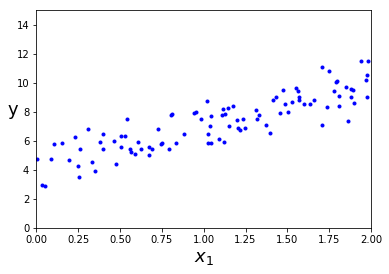

In [96]:
plt.plot(X,y, 'b.')
plt.xlabel('$x_1$', fontsize =18)
plt.ylabel('y', fontsize =18, rotation = 0)
plt.axis([0,2,0,15])

In [97]:
#Using the Normal equation
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_b

array([[1.        , 1.79647613],
       [1.        , 1.55360666],
       [1.        , 0.15295991],
       [1.        , 1.9734582 ],
       [1.        , 0.54273193],
       [1.        , 0.19716585],
       [1.        , 1.65862847],
       [1.        , 1.41335107],
       [1.        , 1.23443761],
       [1.        , 0.31196173],
       [1.        , 0.95699223],
       [1.        , 1.56111205],
       [1.        , 0.60724788],
       [1.        , 0.62337966],
       [1.        , 0.00628181],
       [1.        , 0.3484868 ],
       [1.        , 1.75081125],
       [1.        , 0.88349298],
       [1.        , 1.968469  ],
       [1.        , 0.79141593],
       [1.        , 1.43037291],
       [1.        , 0.56383809],
       [1.        , 0.72761928],
       [1.        , 0.38145198],
       [1.        , 0.69412474],
       [1.        , 1.09447504],
       [1.        , 1.98354576],
       [1.        , 1.32840343],
       [1.        , 0.39849191],
       [1.        , 0.08992288],
       [1.

In [98]:
theta_best
#Normal eq predicted the theta values as below.

array([[4.17795097],
       [2.87092976]])

In [99]:
#Using this theta we will predict the values of y
X_new = np.array([[0],[2]])
X_new

array([[0],
       [2]])

In [100]:
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [101]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.17795097],
       [9.91981048]])

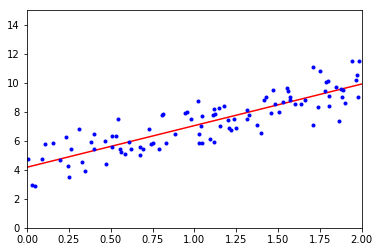

In [102]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lin_reg= LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.17795097]), array([[2.87092976]]))

In [105]:
lin_reg.predict(X_new)

array([[4.17795097],
       [9.91981048]])

In [106]:
n_epochs = 50
t0, t1 = 5, 50

In [107]:
def learning_schedule(t):
    return t0/(t+t1)

In [108]:
theta = np.random.randn(2,1)

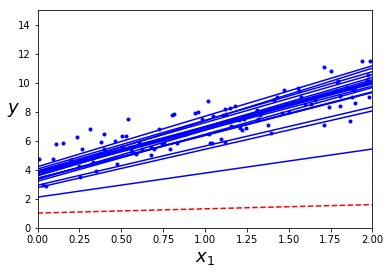

In [109]:
m=len(X_b)
theta_path_sgd=[]

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)      
plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show() 

In [110]:
theta

array([[4.16781892],
       [2.86868054]])

In [111]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [112]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.11818637]), array([2.85453335]))

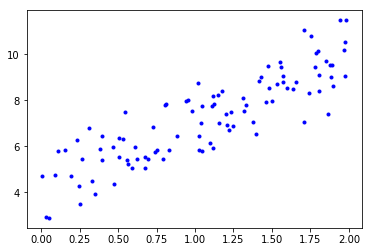

In [113]:
plt.plot(X, y, 'b.')

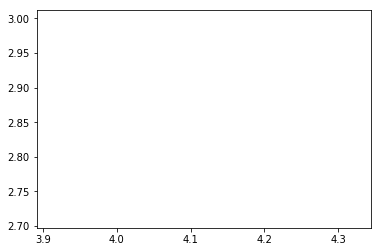

In [114]:
plt.plot(sgd_reg.intercept_, sgd_reg.coef_)

In [115]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
theta


array([[4.15518825],
       [2.86894633]])

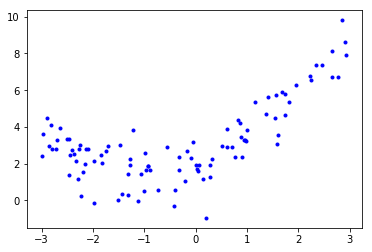

In [118]:
m = 100
X= 6* np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)
plt.plot(X, y, 'b.')

In [119]:
from sklearn.preprocessing import PolynomialFeatures

In [122]:
poly_features = PolynomialFeatures(degree = 2, include_bias= False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.4436696])

In [123]:
X_poly[0]

array([-1.4436696,  2.0841819])

In [124]:
lin_reg = LinearRegression()

In [126]:
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
lin_reg.intercept_, lin_reg.coef_

(array([1.96301211]), array([[0.94048827, 0.48463253]]))

In [129]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly= poly_features.fit_transform(X_new)
y_pred_poly = lin_reg.predict(X_new_poly)

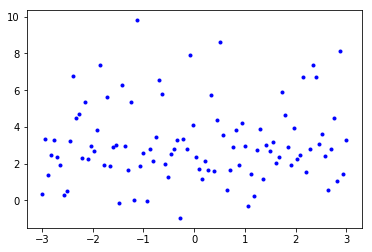

In [134]:
plt.plot(X_new, y, 'b.')

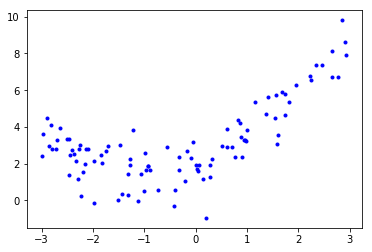

In [132]:
plt.plot(X, y, 'b.')

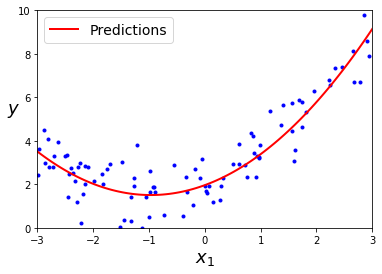

In [135]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred_poly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [136]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [173]:
def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y , test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.figure(figsize=(15,7))
    plt.subplot(1, 2, 1)
    plt.title('RMSE vs Training set')
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=2, label = 'val')
    
    plt.subplot(1, 2, 2)
    plt.title("Data set")
    plt.plot(X_train, y_train, 'g.')
    plt.plot(X_val, y_val_predict, 'r-')

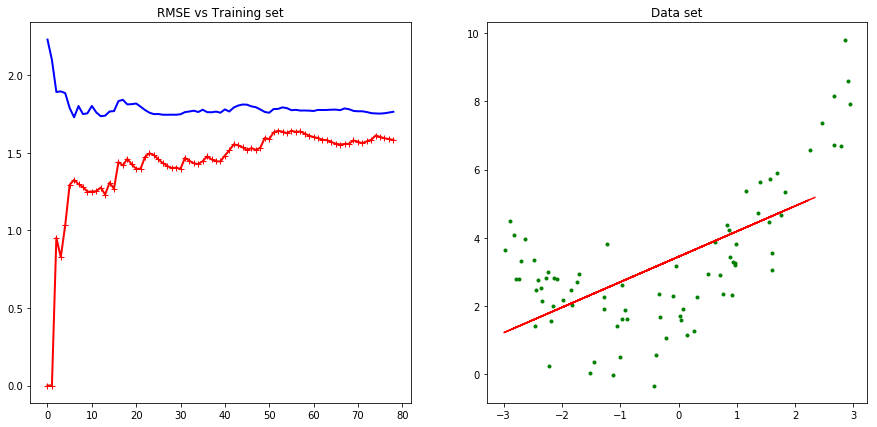

In [174]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

In [175]:
from sklearn.pipeline import Pipeline

In [176]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias= False)),
    ("lin_reg", LinearRegression()),
])

NameError: name 'y_val_predict' is not defined

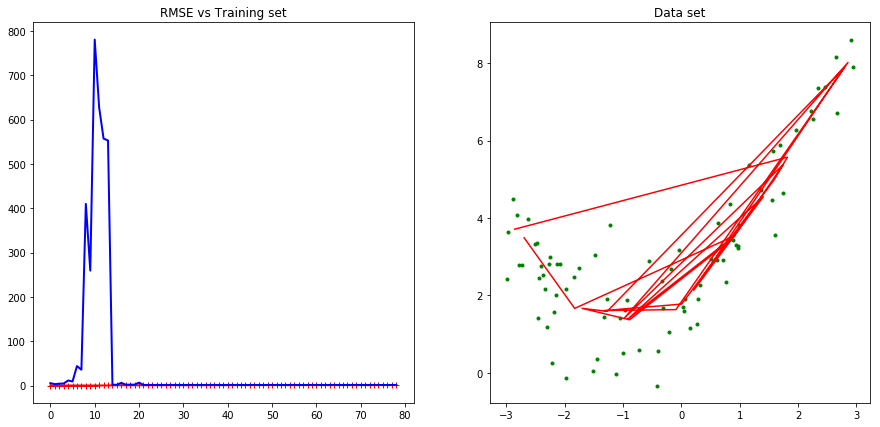

In [179]:
plot_learning_curve(polynomial_regression, X, y)


In [180]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [181]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [182]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

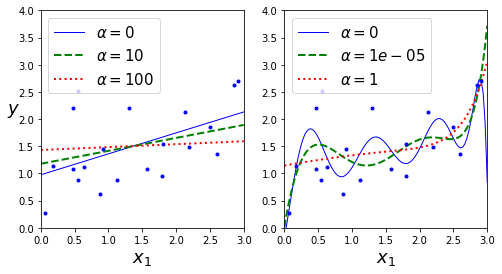

In [184]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()